In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import cv2
from pathlib import Path
import skimage.io as io
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import os
import pickle
import pydicom

In [3]:
DATA_DIR = Path('input/rsna-breast-cancer-detection/')

In [4]:
train = pd.read_csv(DATA_DIR/'train.csv')

In [5]:
train.describe()

,site_id,patient_id,image_id,age,cancer,biopsy,invasive,BIRADS,implant,machine_id
count,54706.000000,54706.000000,5.470600e+04,54669.000000,54706.000000,54706.000000,54706.000000,26286.000000,54706.000000,54706.000000
mean,1.460407,32698.865262,1.079386e+09,58.543928,0.021168,0.054272,0.014953,0.772350,0.026999,54.618378
std,0.498434,18893.861534,6.183269e+08,10.050884,0.143944,0.226556,0.121365,0.590062,0.162081,44.784800
min,1.000000,5.000000,6.849100e+04,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
25%,1.000000,16481.000000,5.458153e+08,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000
50%,1.000000,32432.000000,1.082689e+09,59.000000,0.000000,0.000000,0.000000,1.000000,0.000000,49.000000
75%,2.000000,48999.000000,1.613228e+09,66.000000,0.000000,0.000000,0.000000,1.000000,0.000000,49.000000
max,2.000000,65534.000000,2.147472e+09,89.000000,1.000000,1.000000,1.000000,2.000000,1.000000,216.000000


In [6]:
train['view'].value_counts()

MLO    27903
CC     26765
AT        19
LM        10
ML         8
LMO        1
Name: view, dtype: int64

In [7]:
train.groupby('patient_id').agg({'cancer': 'sum'}).value_counts()

cancer
0         11427
2           343
3           107
4            29
5             7
dtype: int64

In [8]:
train.groupby('patient_id').agg({'image_id': 'count'}).value_counts()

image_id
4           8233
5           1767
6           1218
7            276
8            229
9             99
10            53
11            19
12            12
13             5
14             2
dtype: int64

In [9]:
train.groupby(['patient_id', 'laterality']).agg({'cancer': 'std'}).value_counts() # No label dismatch with LR 


cancer
0.0       23826
dtype: int64

# Dataset

In [84]:
from datasets import PatientLevelDataset
from architectures import MultiInputModel
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2
import torch

In [40]:
ds = PatientLevelDataset(
    df=train, image_dir=Path('input/rsna-breast-cancer-detection/image_resized_1024'),
    transforms=ToTensorV2()
)

In [71]:
img0, img1, label = ds[2]

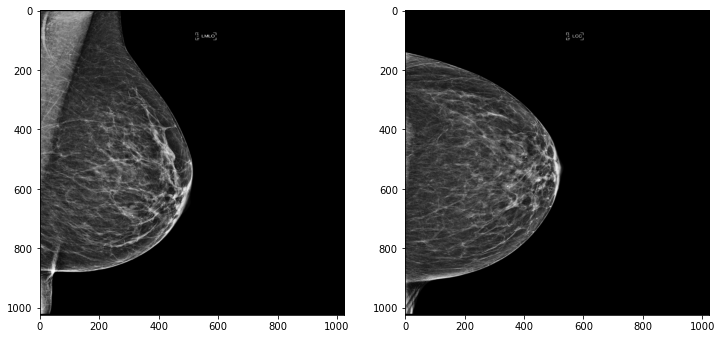

In [72]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img0[0], cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(img1[0], cmap='gray')
plt.show()

In [86]:
model = MultiInputModel()
with torch.no_grad():
    print(model(img0.float()[None, :, :], img1.float()[None, :, :]))

tensor([[0.0190]])
